## kNN近邻算法

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 原始数据 list
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [11]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

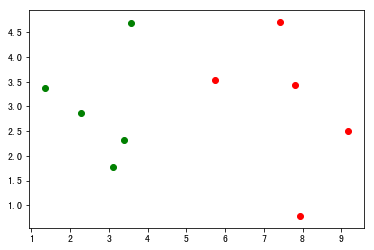

In [22]:
# 每一个点在特征平面中的位置
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')

In [25]:
# 属于哪一类(良性、恶性肿瘤)
x = np.array([8.093607318, 3.365731514])

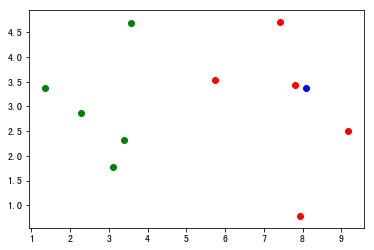

In [26]:
# 单独绘制
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')

### kNN的过程

In [35]:
distance = []
for x_train in X_train:
    # 欧拉距离
    d = np.sqrt(np.sum((x - x_train)**2))
    distance.append(d)
distance

[4.8125669076098774,
 5.2292708272353048,
 6.7497989991600642,
 4.6986266144110695,
 5.8346001455685697,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.30643199929749998,
 2.5786840957478887]

In [43]:
# [np.sqrt(np.sum((x - x_train)**2)) for x_train in X_train]
# [np.linalg.norm(x - x_train) for x_train in X_train]
# 以后计算欧拉距离 直接拿去用！

In [46]:
# 对结果进行排序，返回排序结果的索引
nearest = np.argsort(distance)
# 最近4个点 8，7，5，6
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [53]:
k = 6
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [55]:
from collections import Counter
# 统计频数
Counter(topK_y)

Counter({0: 1, 1: 5})

In [56]:
# 投票
votes = Counter(topK_y)
votes.most_common(1)

[(1, 5)]

In [58]:
# 最终结果
predict_y = votes.most_common(1)[0][0]
predict_y

1